In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.svm import SVC

In [4]:
X = cancer.data[:, :2]
y = cancer.target

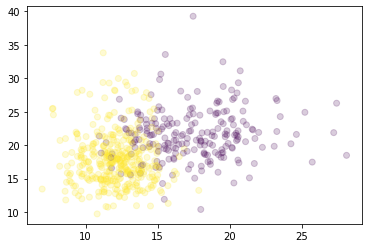

In [5]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.2)

In [6]:
model = SVC(probability=True) # probability: 확률점수 계산
model.fit(X, y)
model.score(X, y)

0.9121265377855887

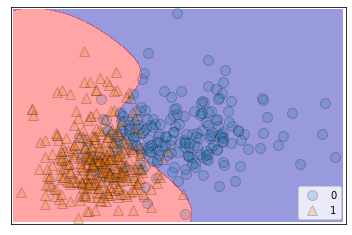

In [7]:
import mglearn
#mglearn.plots.plot_2d_classification(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc=4)

In [8]:
xmax = X[:,0].max()+1
xmin = X[:,0].min()-1
ymax = X[:,1].max()+1
ymin = X[:,1].min()-1

In [9]:
xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

In [10]:
sv=model.support_vectors_

In [11]:
fig=plt.figure(figsize=[14,12])

<Figure size 1008x864 with 0 Axes>

<a list of 8 text.Text objects>

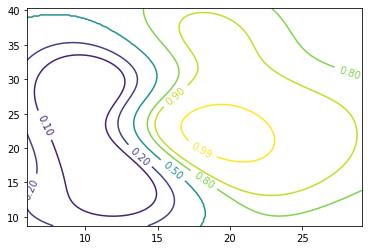

In [12]:
# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

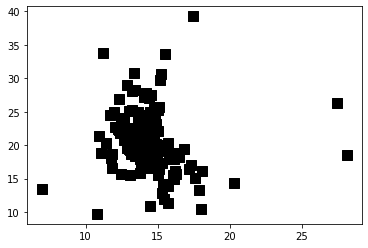

In [13]:
# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

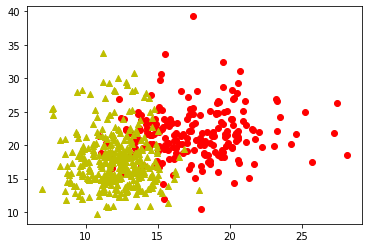

In [14]:
# show train samples
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',c='r',label='malignant')
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='^',c='y',label='benign')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-15-133c03884ef2>:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(CS,shrink=0.5)


Text(0.5, 1.0, 'SVM - decision bounds')

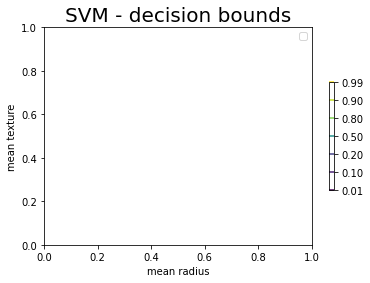

In [15]:
plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)

In [16]:
from sklearn.model_selection import train_test_split

X = cancer.data[:, :30]
y = cancer.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [18]:
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s


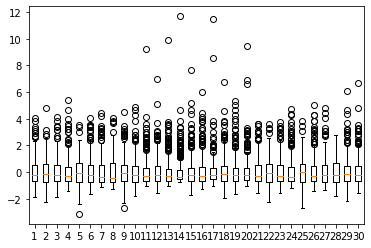

In [19]:
plt.boxplot(X_train_norm); pass

In [26]:
model = SVC()
model.fit(X_train_norm, y_train)
train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)

print(test_score, train_score)

0.993006993006993 0.9859154929577465
